In [35]:
import pandas as pd
from pandas import DataFrame,Series
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [3]:
perceptron_train = pd.read_csv('../FeaturesCsvFile/featuresfile.csv')
perceptron_test = pd.read_csv('../FeaturesCsvFile/featuresfile_10.csv')
pd.options.display.max_columns = None

print ('(#row,#column) of train dataset' , perceptron_train.shape)
print ('(#row,#column) of test dataset' , perceptron_test.shape)

('(#row,#column) of train dataset', (417, 46))
('(#row,#column) of test dataset', (518, 46))


In [4]:
X_train = perceptron_train.values[:, 2:45]
y_train = perceptron_train.values[:, 45]
X_test = perceptron_test.values[:, 2:45]
y_test = perceptron_test.values[:, 45]

In [5]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train, y_train)
y_pred = ppn.predict(X_test)

In [19]:
print('Accuracy of Accuracy Score : %.2f' % accuracy_score(y_test,y_pred))

Accuracy of Accuracy Score : 0.87


In [20]:
print('Accuracy of Perceptron Score: %.2f' % ppn.score(X_test,y_test))

Accuracy of Perceptron Score: 0.87


In [21]:
print ('Confusion_matrix')
print(confusion_matrix(y_test,y_pred))

Confusion_matrix
[[223  35]
 [ 30 230]]


In [7]:
print ('Important features (featureName, weigh of important, #column)')
header = list(perceptron_train.head(1))
important_feature = []
for i in range(0,len(ppn.coef_[0])):
    important_feature.append((header[i+2],ppn.coef_[0][i],i+2))
sorted_list = sorted(important_feature,key=lambda important_feature: important_feature[1],reverse=True)
for j in range(0,len(sorted_list)):
        first_imp_fea = sorted_list[0]
        second_imp_fea = sorted_list[1]
        print sorted_list[j]

Important features (featureName, weigh of important, #column)
('AvgAcc-y', 56.016152201096546, 39)
('TimeDiffPeaks-z', 38.452190066290193, 34)
('TimeDiffPeaks-y', 31.430106357990134, 33)
('AvgAcc-x', 27.749521411401602, 38)
('Bin6,x', 1.9878066261171476, 7)
('Bin5,x', 0.70951008977900321, 6)
('Bin10,y', 0.65341690434481836, 21)
('Bin9,y', 0.58454906620862035, 20)
('Bin2,z', 0.28788337520672441, 23)
('Bin9,z', 0.043874196703566674, 30)
('Bin8,y', 0.030242959453366035, 19)
('Bin8,z', -0.061949601728730153, 29)
('Bin3,z', -0.068713642445832501, 24)
('Bin1,x', -0.16977406999783445, 2)
('Bin1,z', -0.22895117334842333, 22)
('Bin10,z', -0.34931389964077736, 31)
('Bin7,x', -0.36231032811537289, 8)
('Bin1,y', -0.65001384163550535, 12)
('Bin2,x', -1.0815646018321707, 3)
('Bin5,y', -1.1891795657443731, 16)
('Bin4,x', -1.2471331273463679, 5)
('Bin7,y', -1.4749954714119438, 18)
('Bin7,z', -1.5604533155591052, 28)
('Bin10,x', -1.6187632573087811, 11)
('Bin4,y', -1.9177902271955432, 15)
('Bin3,x', -1

In [45]:
perceptron_train['color'] = Series([(0 if x == "walking" else 1) for x in perceptron_train['Label']])
my_color_map = ListedColormap(['skyblue','coral'],'mycolormap')
perceptron_test['color'] = Series([(0 if x == "walking" else 1) for x in perceptron_test['Label']])

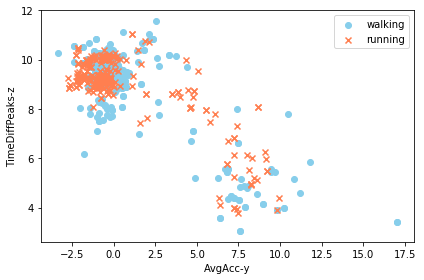

In [49]:
y = perceptron_test.iloc[:, 45].values
y = np.where(y == 'walking', -1, 1) 
X = perceptron_test.iloc[:, [38, 40]].values
plt.scatter(X[:len(perceptron_test)/2, 0], X[:len(perceptron_test)/2, 1],
           color='skyblue', marker='o', label='walking')
plt.scatter(X[len(perceptron_test)/2:len(perceptron_test), 0], X[len(perceptron_test)/2:len(perceptron_test), 1],
            color='coral', marker='x', label='running')

plt.xlabel('%s'%first_imp_fea[0])
plt.ylabel('%s'%second_imp_fea[0])
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

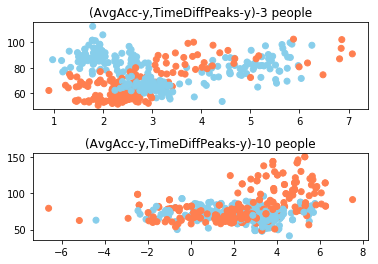

In [44]:
#walking and running data points for training set(3 people data)
perceptron_train['color'] = Series([(0 if x == "walking" else 1) for x in perceptron_train['Label']])
my_color_map = ListedColormap(['skyblue','coral'],'mycolormap')
perceptron_test['color'] = Series([(0 if x == "walking" else 1) for x in perceptron_test['Label']])

plt.subplot(2,1,1)
plt.scatter(perceptron_train['AvgAcc-y'],perceptron_train['TimeDiffPeaks-y'],c = perceptron_train['color'], cmap=my_color_map
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAcc-y,TimeDiffPeaks-y)-3 people")

#walking and running data points for test set(10 people data)
plt.subplot(2,1,2)
plt.scatter(perceptron_test['AvgAcc-y'],perceptron_test['TimeDiffPeaks-y'],c = perceptron_test['color'], cmap=my_color_map
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAcc-y,TimeDiffPeaks-y)-10 people")
plt.subplots_adjust(hspace=0.5)
plt.show()
# plt.savefig('./Data-Visualization/images/scatter_AvgAbsDiffxy_dt_train_3_val_10.png',dpi=1000)

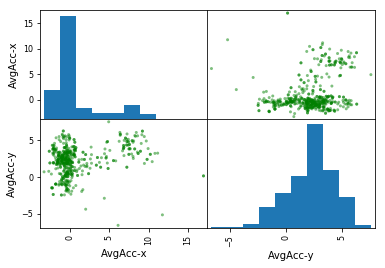

In [50]:
frame = perceptron_test.loc[:,['AvgAcc-x','AvgAcc-y']]
test=scatter_matrix(frame,color='g')
plt.show()